# Titanic Passangers Data Analysis

## Questions

The data to analyse includes information from passengers of Titanic, that collided with an iceberg on 15 April 1912. From 2224 people on board 1500 died. In the CVS used in this project we have data from 891 people. We usually see in movies that in case of a dangerous situation or catastrophe, women and children have priority. We are going to investigate if that was the case here too or there were some other factors that could affect the chances to survive:

- Gender
- Age
- Passenger Class (wealth)

So, the questions we want to answer is if those characteristics could increase or decrease your chances to survive.

## Data Wrangling 

In [736]:
import pandas as pd
import seaborn as sns
import numpy as np
from math import sqrt

filename = "titanic_data.csv"
titanic_data = pd.read_csv(filename)

This is a small number of lines that shows the kind of information we are going to work on. This is the column information taken from https://www.kaggle.com/c/titanic/data that we will use as reference:

`survival        Survival
                (0 = No; 1 = Yes)
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton) `

In [737]:
titanic_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [738]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


I start the data analysis by describing the data. The first row, that counts the number of elements per column, can be used to see if there are numbers that doesn't look good. It shows something we need to investigate. We have 891 passengers, but only 889 have Port of Embarkation so two people are missing. The idea is to check if those two people were really in the Titanic. Since there are only two people, we can just find the names and do a quick search in Google.

I use the following link as reference in order to be able to find nulls and then print the name:

http://stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value

Both Icard, Miss. Amelie and Stone, Mrs. George Nelson (Martha Evelyn) actually embarked, so the values are correct and don't need to be removed since they don't affect the answers to the questions we have.

There are also 177 without age. They still have information like gender and if survived or not, so the information is still need. When we group by age, those with NaN will be ignored so won't affect be listed anyway. Taking in account that we only have 891 people from the total number of passenges, and 177 don't even have age, we would need to take the age study result with a pinch of salt.

In [739]:
# Find those with null embarked value
titanic_data_without_embarked = titanic_data[titanic_data.Embarked.isnull()]
titanic_data_without_embarked["Name"]

61                           Icard, Miss. Amelie
829    Stone, Mrs. George Nelson (Martha Evelyn)
Name: Name, dtype: object

Data description shows that children with less than one year are showed in fractional way:

"Fractional if Age less than One (1)"

Using that information to group by age could cause problems, so we are going to round all those less than one year to one. After the change, our data that does "Age: 1" will actually mean between 0 and 1. To do that, I apply a function to the column "Age" and store it again in the original data.

In [740]:
def normalize_age_below_one(age):
    if age.item() < 1:
        return 1
    else:
        return age.item()
        
titanic_data['Age'] = titanic_data['Age'].apply(normalize_age_below_one)

## Analyzing the data

### Survivors per Class

First piece of data to check is the number of survivors per Class. Usually the ticket class is usually related with the wealth. In this first graph we compare the total numeber of passengers per class and how many of them survived. We merged two bar graphs to get a picture that could show us the relation between the number of people on each class and how many survived.



,Survived,Total
Adult_Kid,,
"(0, 2]",15,24
"(2, 4]",12,16
"(4, 8]",9,14
"(8, 10]",2,10
"(10, 15]",11,19
"(15, 20]",33,96
"(20, 30]",84,230
"(30, 40]",69,155
"(40, 50]",33,86


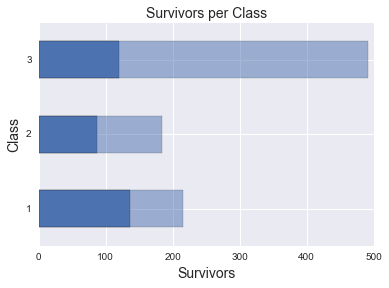

In [741]:
# Bar plot
gp=titanic_data.groupby(['Pclass']).sum()['Survived'].plot(kind='barh')
gp=titanic_data.groupby(['Pclass']).count()['PassengerId'].plot(kind='barh',alpha=0.5)

gp.set_xlabel('Survivors', fontsize=14)
gp.set_ylabel('Class', fontsize=14)
gp.set_title("Survivors per Class", fontsize=14)

# Both dataframes are merged and columns renamed
merged = by_survived.merge(by_passenger,left_index=True,right_index=True)
merged.columns=['Survived', 'Total']
merged

Now, we calculate the surviving ratio on each class. The idea is to see if there are groups with higher surviving ratio than others.

First class survival ratio: 0.6296
Second class ratio: 0.4728
Third class ratio: 0.2424


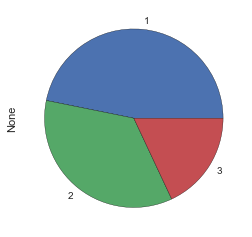

In [742]:
by_survived=titanic_data.groupby('Pclass')[['Survived']].sum()
by_passenger=titanic_data.groupby('Pclass')[['PassengerId']].count()

# We get the ratio per class and print it, rounded to two decimals
ratio = (by_survived['Survived'] / by_passenger['PassengerId'])*100
print "First class survival ratio: " + str(round(ratio[1],2)/100)
print "Second class ratio: " + str(round(ratio[2],2)/100)
print "Third class ratio: " + str(round(ratio[3],2)/100)

gp = ratio.plot.pie()
gp.set_aspect(1)

## Statistical test

**Null: u1 - u2 = 0**

**Alternative u1 > u2**

**One tail test (being on first class increases your chances of surviving over third class)**

**alpha = 0,05**

In [743]:
first=titanic_data[titanic_data.Pclass.eq(1)]
third=titanic_data[titanic_data.Pclass.eq(3)]

first_Survived=first["Survived"]
third_Survived=third["Survived"]

# 0.742038216561
first_mean=first["Survived"].mean() # 0.62962962963
first_std=first["Survived"].std() # 0.484025611327
first_size=first["Survived"].count() # 216
third_mean=third["Survived"].mean() # 0.242362525458
third_std=third["Survived"].std() # 0.428949498646
third_size=third["Survived"].count() # 491

# Standard Error
se = sqrt(((first_std * first_std) / first_size) + ((third_std * third_std) / third_size)) # 0.0382017535619
# T statistics
ts = (first_mean - third_mean) / se # 10.1374169524
print "T-statistics: " + str(ts)
# Degrees of freedom
df = (first_size + third_size) - 2 # 705
# t critical vaue is 1.647017861844855, calculated using:
# http://scistatcalc.blogspot.com.es/2013/11/online-critical-t-value-calculator.html
tc = 1.647017861844855
print "T-critical: " + str(tc)

T-statistics: 10.1374169524
T-critical: 1.64701786184


### Survivors per Gender

This analysis is similar to the one done with classes. In this case, we check if gender can affect the surviving chances.

,Survived,Total
Sex,,
female,233,314
male,109,577


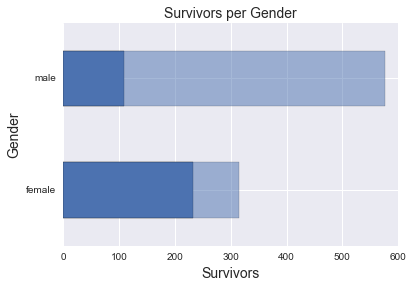

In [744]:
gp=titanic_data.groupby(['Sex']).sum()['Survived'].plot(kind='barh')
gp=titanic_data.groupby(['Sex']).count()['PassengerId'].plot(kind='barh',alpha=0.5)

gp.set_xlabel('Survivors', fontsize=14)
gp.set_ylabel('Gender', fontsize=14)
gp.set_title("Survivors per Gender", fontsize=14)
titanic_data.groupby('Sex')[['Survived']].sum()

by_survived=titanic_data.groupby('Sex')[['Survived']].sum()
by_passenger=titanic_data.groupby('Sex')[['PassengerId']].count()

# Both dataframes are merged and columns renamed
merged = by_survived.merge(by_passenger,left_index=True,right_index=True)
merged.columns=['Survived', 'Total']
merged

We get the ratio between the survivors by gender and the total number of passengers.

Female survival ratio: 0.2615
Male survival ratio: 0.1223


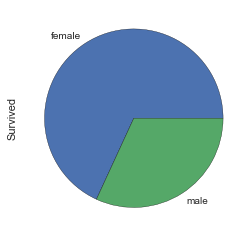

In [745]:
by_survived=titanic_data.groupby('Sex')[['Survived']].sum()
#by_passenger=titanic_data.groupby('Sex')[['PassengerId']].count()

# We get the ratio per gender and print it, rounded to two decimals
ratio = (by_survived['Survived'] / titanic_data['PassengerId'].count())*100
print "Female survival ratio: " + str(round(ratio[0],2)/100)
print "Male survival ratio: " + str(round(ratio[1],2)/100)

gp = ratio.plot.pie()
gp.set_aspect(1)

## Statistical test

**Null: u1 - u2 = 0**

**Alternative u1 > u2**

**One tail test (being on first class increases your chances of surviving over third class)**

**alpha = 0,05**

In [746]:
female=titanic_data[titanic_data.Sex.eq("female")]
male=titanic_data[titanic_data.Sex.eq("male")]

female_Survived=female["Survived"]
male_Survived=male["Survived"]

# 0.742038216561
fem_mean=female["Survived"].mean() # 0.742038216561
fem_std=female["Survived"].std() # 0.438211203916
fem_size=female["Survived"].count() # 314
male_mean=male["Survived"].mean() # 0.188908145581
male_std=male["Survived"].std() # 0.391775277786
male_size=male["Survived"].count() # 577

# Standard Error
se = sqrt(((fem_std * fem_std) / fem_size) + ((male_std * male_std) / male_size)) # 0.0296237688999
# T statistics
ts = (fem_mean - male_mean) / se # 18.6718331773
print "T-statistics: " + str(ts)
# Degrees of freedom
df = (fem_size + male_size) - 2 # 889
# t critical vaue is 1.646569451388022, calculated using:
# http://scistatcalc.blogspot.com.es/2013/11/online-critical-t-value-calculator.html
tc = 1.646569451388022
print "T-critical: " + str(tc)

T-statistics: 18.6718331773
T-critical: 1.64656945139


### Survivors per age

Now, the third data to analyse is the age of surviving passengers to see if it could affect your chances to survive. to make the graph easier to understand, we group the ages.

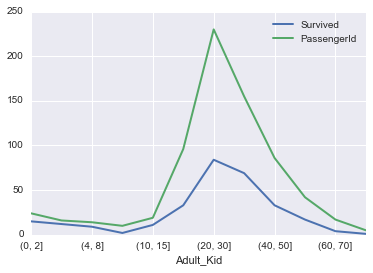

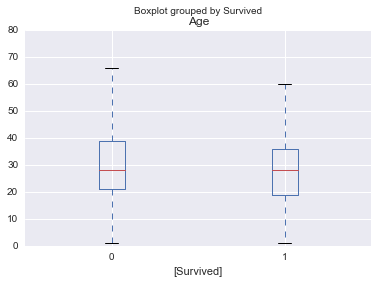

In [747]:
titanic_data['Adult_Kid'] = pd.cut(titanic_data['Age'], bins=[0,2,4,8,10,15,20,30,40,50,60,70,80])
titanic_data.groupby(['Adult_Kid']).sum()['Survived'].plot(linewidth=2,legend='Survived')
titanic_data.groupby(['Adult_Kid']).count()['PassengerId'].plot(linewidth=2,legend='Passengers')

titanic_data.boxplot(column=['Age'], by=['Survived'])

Here we analyse the ratio of survival in each age group.

Adult_Kid
(0, 2]      0.625000
(2, 4]      0.750000
(4, 8]      0.642857
(8, 10]     0.200000
(10, 15]    0.578947
(15, 20]    0.343750
(20, 30]    0.365217
(30, 40]    0.445161
(40, 50]    0.383721
(50, 60]    0.404762
(60, 70]    0.235294
(70, 80]    0.200000
dtype: float64


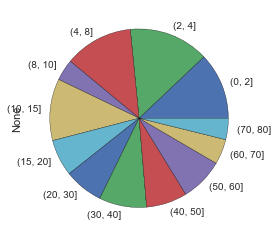

In [748]:
by_survived=titanic_data.groupby('Adult_Kid')[['Survived']].sum()
by_passenger=titanic_data.groupby('Adult_Kid')[['PassengerId']].count()

ratio = by_survived['Survived'] / by_passenger['PassengerId']
print ratio

gp = ratio.plot.pie()
gp.set_aspect(1)

## Conclusions

I have performed a comparison based analysis to see the relation between a variable and how it changes the surviving changes. Passenger Class, Gender and Age where the ones to analyze.

**Class**

The class showed that people in first class had a better surviving ratio than those in second and third class. Being the third class the one with more people in it and with the lowest surviving ratio. The comparison show us that a person in third class had less chances to survive than one in first class.

**Gender**

Gender shows a similar pattern than the one we saw with class. There were much more males in the ship but still the number of women that survived was greater. Pie plot shows the ratio difference between two and it makes clear that in most of the cases women could have preference over men.

**Age**

Here we divided the passengers in groups, depending on the age to get easier to understand graphs. Checking the first plot we see that the survival ratio seems pretty good between age 0 and 15, where the lines of total (passengers/survivors) look pretty similar. From that point is where the ratio gets worse. We could get the conclusion that children from 0-15 had preference over adult people. If we check groups from 0 to 15 in pie graph we see that they together have a good ratio.

**Summary**

The comparison analysis shows that there could be a relationship between your chances to survive and those three variables, class, gender and age. It is important to mention that we are not working with the full data set. We have only 891 passengers when there were actually 2344 estimated passengers and crew. So, we are working with 26,4% of the data. Still, gender and class have pretty solid ratios so I wound't expect it to change that much. Age is a bit more difficult to just estimate by comparison with partial data, because even in our .csv some people don't have age recorded so we are working with even smaller data set.

In order to check if my comparison analysis is correct I have run and independent samples t test on both gender and class tests. In both cases null hypothesis is rejected because the u1 - u2 is not 0. And the alternative, that says that u1 > u2 is accepted, because our t statistic is always much greated than t critical value.
